In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import cv2
import glob as gb
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.datasets import cifar10
from keras.applications import ResNet152V2, VGG16, VGG19, InceptionV3, EfficientNetB7
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.models import Model, Sequential, load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score, recall_score, precision_score, f1_score,roc_curve,auc
from sklearn.preprocessing import label_binarize
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import keras.backend as K

In [2]:
import sys
import os

code_folder = r'D:/Corrosion detection/Corrosion Detection/Code'
sys.path.append(code_folder)

from ModelEvaluator import ModelEvaluator, ROCCurvePlotter
from ImageProcessor import ImageReader, ImageLoading

In [3]:
first_model =  load_model('D:/Corrosion detection/Corrosion Detection/models/1st/model_1st_checkpoint.h5')
second_model =  load_model('D:/Corrosion detection/Corrosion Detection/models/2nd/model_2nd_checkpoint.h5')
Object_model =  load_model('D:/Corrosion detection/Corrosion Detection/models/Object/model_checkpoint.h5')

In [4]:
test_1st_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Testing/1st'
test_2nd_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Testing/2nd'
test_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Testing/Object'
pred_path = 'D:/Corrosion detection/Corrosion Detection/Dataset/Pred'

In [5]:
test_1st_code = { 0: "No Corrosion Pipeline", 1: "Pitting", 2: "Uniform Corrosion" }
test_2nd_code = {'Crevice Corrosion':0 ,'No Corrosion Flanges':1 }
test_code = {0: "Flanges", 1: "Pipeline" }
image_loader = ImageLoading()

In [6]:
x_test_1st, y_test_1st = image_loader.load_images(test_1st_path, code=test_1st_code, is_subfolder=True)
x_test_2nd, y_test_2nd = image_loader.load_images(test_2nd_path, code=test_2nd_code, is_subfolder=True)
x_test, y_test = image_loader.load_images(test_path, code=test_code, is_subfolder=True)

3/3 [==============================] - 13s 3s/step
Classification Report:
                       precision    recall  f1-score   support

    Uniform Corrosion       0.94      0.97      0.95        30
No Corrosion Pipeline       1.00      0.97      0.98        30
              Pitting       0.93      0.93      0.93        30

             accuracy                           0.96        90
            macro avg       0.96      0.96      0.96        90
         weighted avg       0.96      0.96      0.96        90

Precision: 0.9563
Recall: 0.9556
F1-score: 0.9557


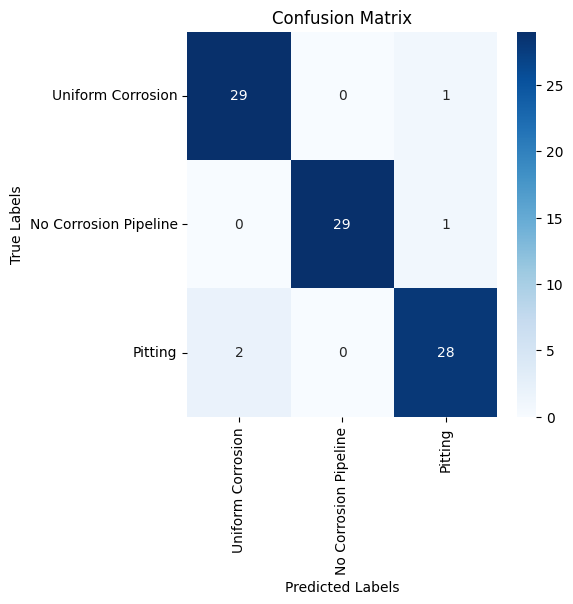

Classification Report:
                       precision    recall  f1-score   support

    Uniform Corrosion       0.94      0.97      0.95        30
No Corrosion Pipeline       1.00      0.97      0.98        30
              Pitting       0.93      0.93      0.93        30

             accuracy                           0.96        90
            macro avg       0.96      0.96      0.96        90
         weighted avg       0.96      0.96      0.96        90

Precision: 0.9563
Recall: 0.9556
F1-score: 0.9557


In [7]:
evaluator = ModelEvaluator(first_model, x_test_1st, y_test_1st, test_1st_code)
evaluator.evaluate()

2/2 [==============================] - 9s 2s/step
Classification Report:
                      precision    recall  f1-score   support

   Crevice Corrosion       0.92      0.96      0.94        25
No Corrosion Flanges       0.96      0.92      0.94        25

            accuracy                           0.94        50
           macro avg       0.94      0.94      0.94        50
        weighted avg       0.94      0.94      0.94        50

Precision: 0.9407
Recall: 0.9400
F1-score: 0.9400


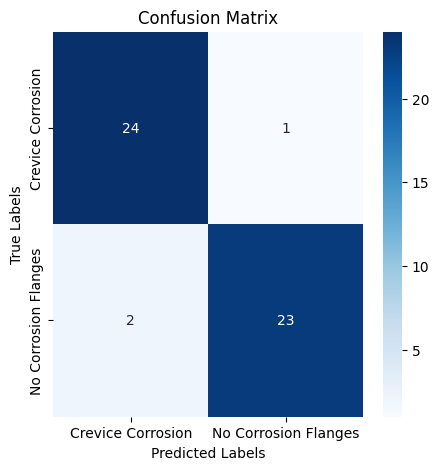

Classification Report:
                      precision    recall  f1-score   support

   Crevice Corrosion       0.92      0.96      0.94        25
No Corrosion Flanges       0.96      0.92      0.94        25

            accuracy                           0.94        50
           macro avg       0.94      0.94      0.94        50
        weighted avg       0.94      0.94      0.94        50

Precision: 0.9407
Recall: 0.9400
F1-score: 0.9400


In [8]:
evaluator = ModelEvaluator(second_model, x_test_2nd, y_test_2nd, test_2nd_code)
evaluator.evaluate()

2/2 [==============================] - 12s 3s/step
Classification Report:
              precision    recall  f1-score   support

    Pipeline       0.97      1.00      0.98        30
     Flanges       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Precision: 0.9839
Recall: 0.9833
F1-score: 0.9833


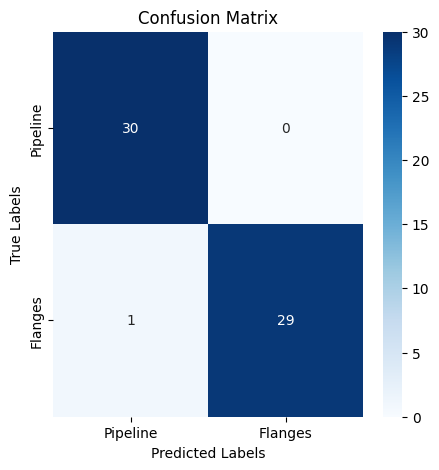

Classification Report:
              precision    recall  f1-score   support

    Pipeline       0.97      1.00      0.98        30
     Flanges       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Precision: 0.9839
Recall: 0.9833
F1-score: 0.9833


In [7]:
evaluator = ModelEvaluator(Object_model, x_test, y_test, test_code)
evaluator.evaluate()

In [8]:
roc1st_plotter = ROCCurvePlotter(first_model, x_test_1st, y_test_1st, test_1st_code)
roc2nd_plotter = ROCCurvePlotter(second_model, x_test_2nd, y_test_2nd, test_2nd_code)
rocO_plotter = ROCCurvePlotter(Object_model, x_test, y_test, test_code)

3/3 [==============================] - 9s 3s/step


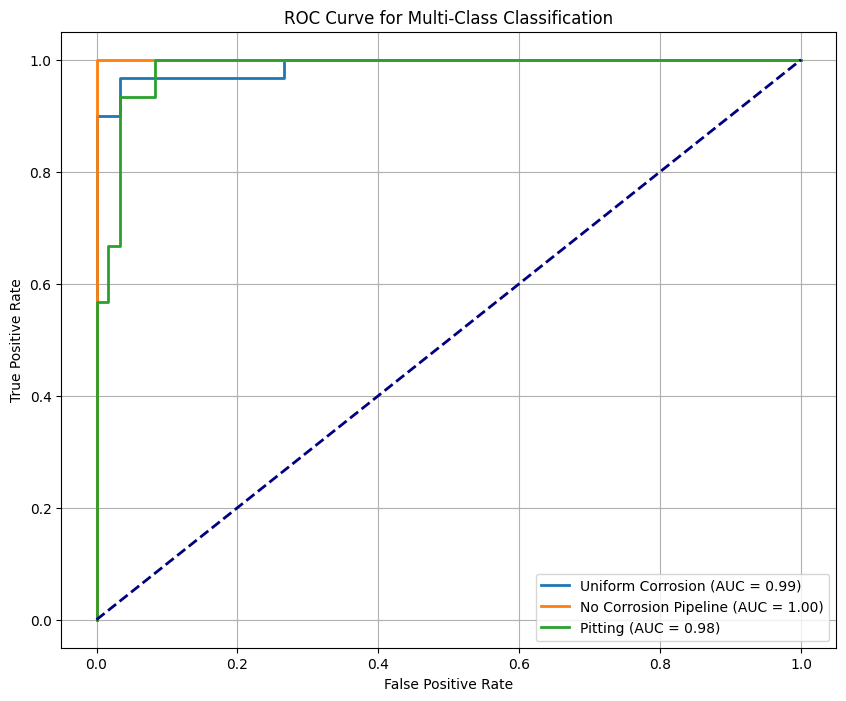

In [11]:
roc1st_plotter.plot_roc_curve()

2/2 [==============================] - 5s 2s/step


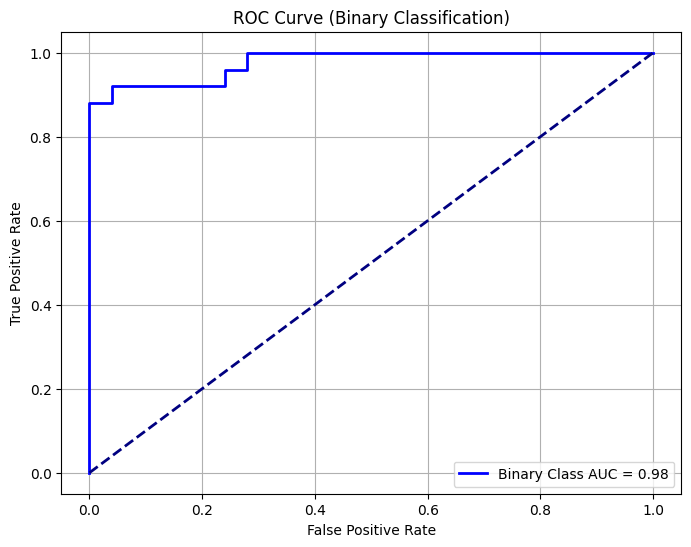

In [12]:
roc2nd_plotter.plot_roc_curve()

2/2 [==============================] - 7s 3s/step


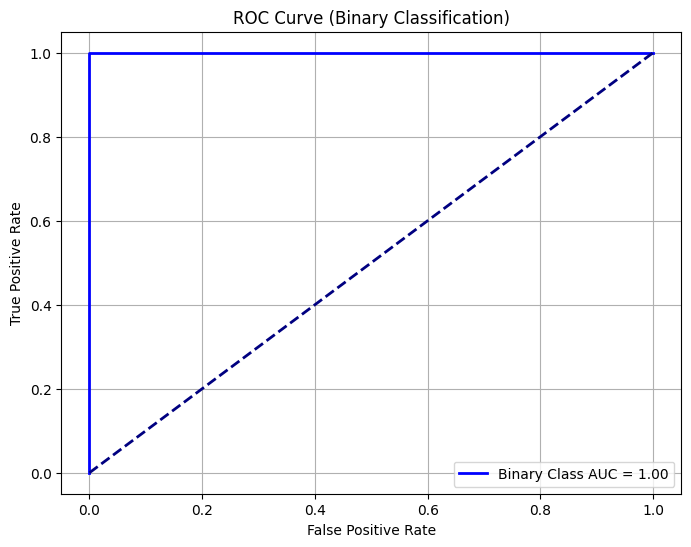

In [9]:
rocO_plotter.plot_roc_curve()